In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


**Questions 1 : Game of Nodes Map**

Handle the logic for the graph, including loading the graph data from the file
and displaying a map (graph) of the given data, with labeled nodes and edges.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


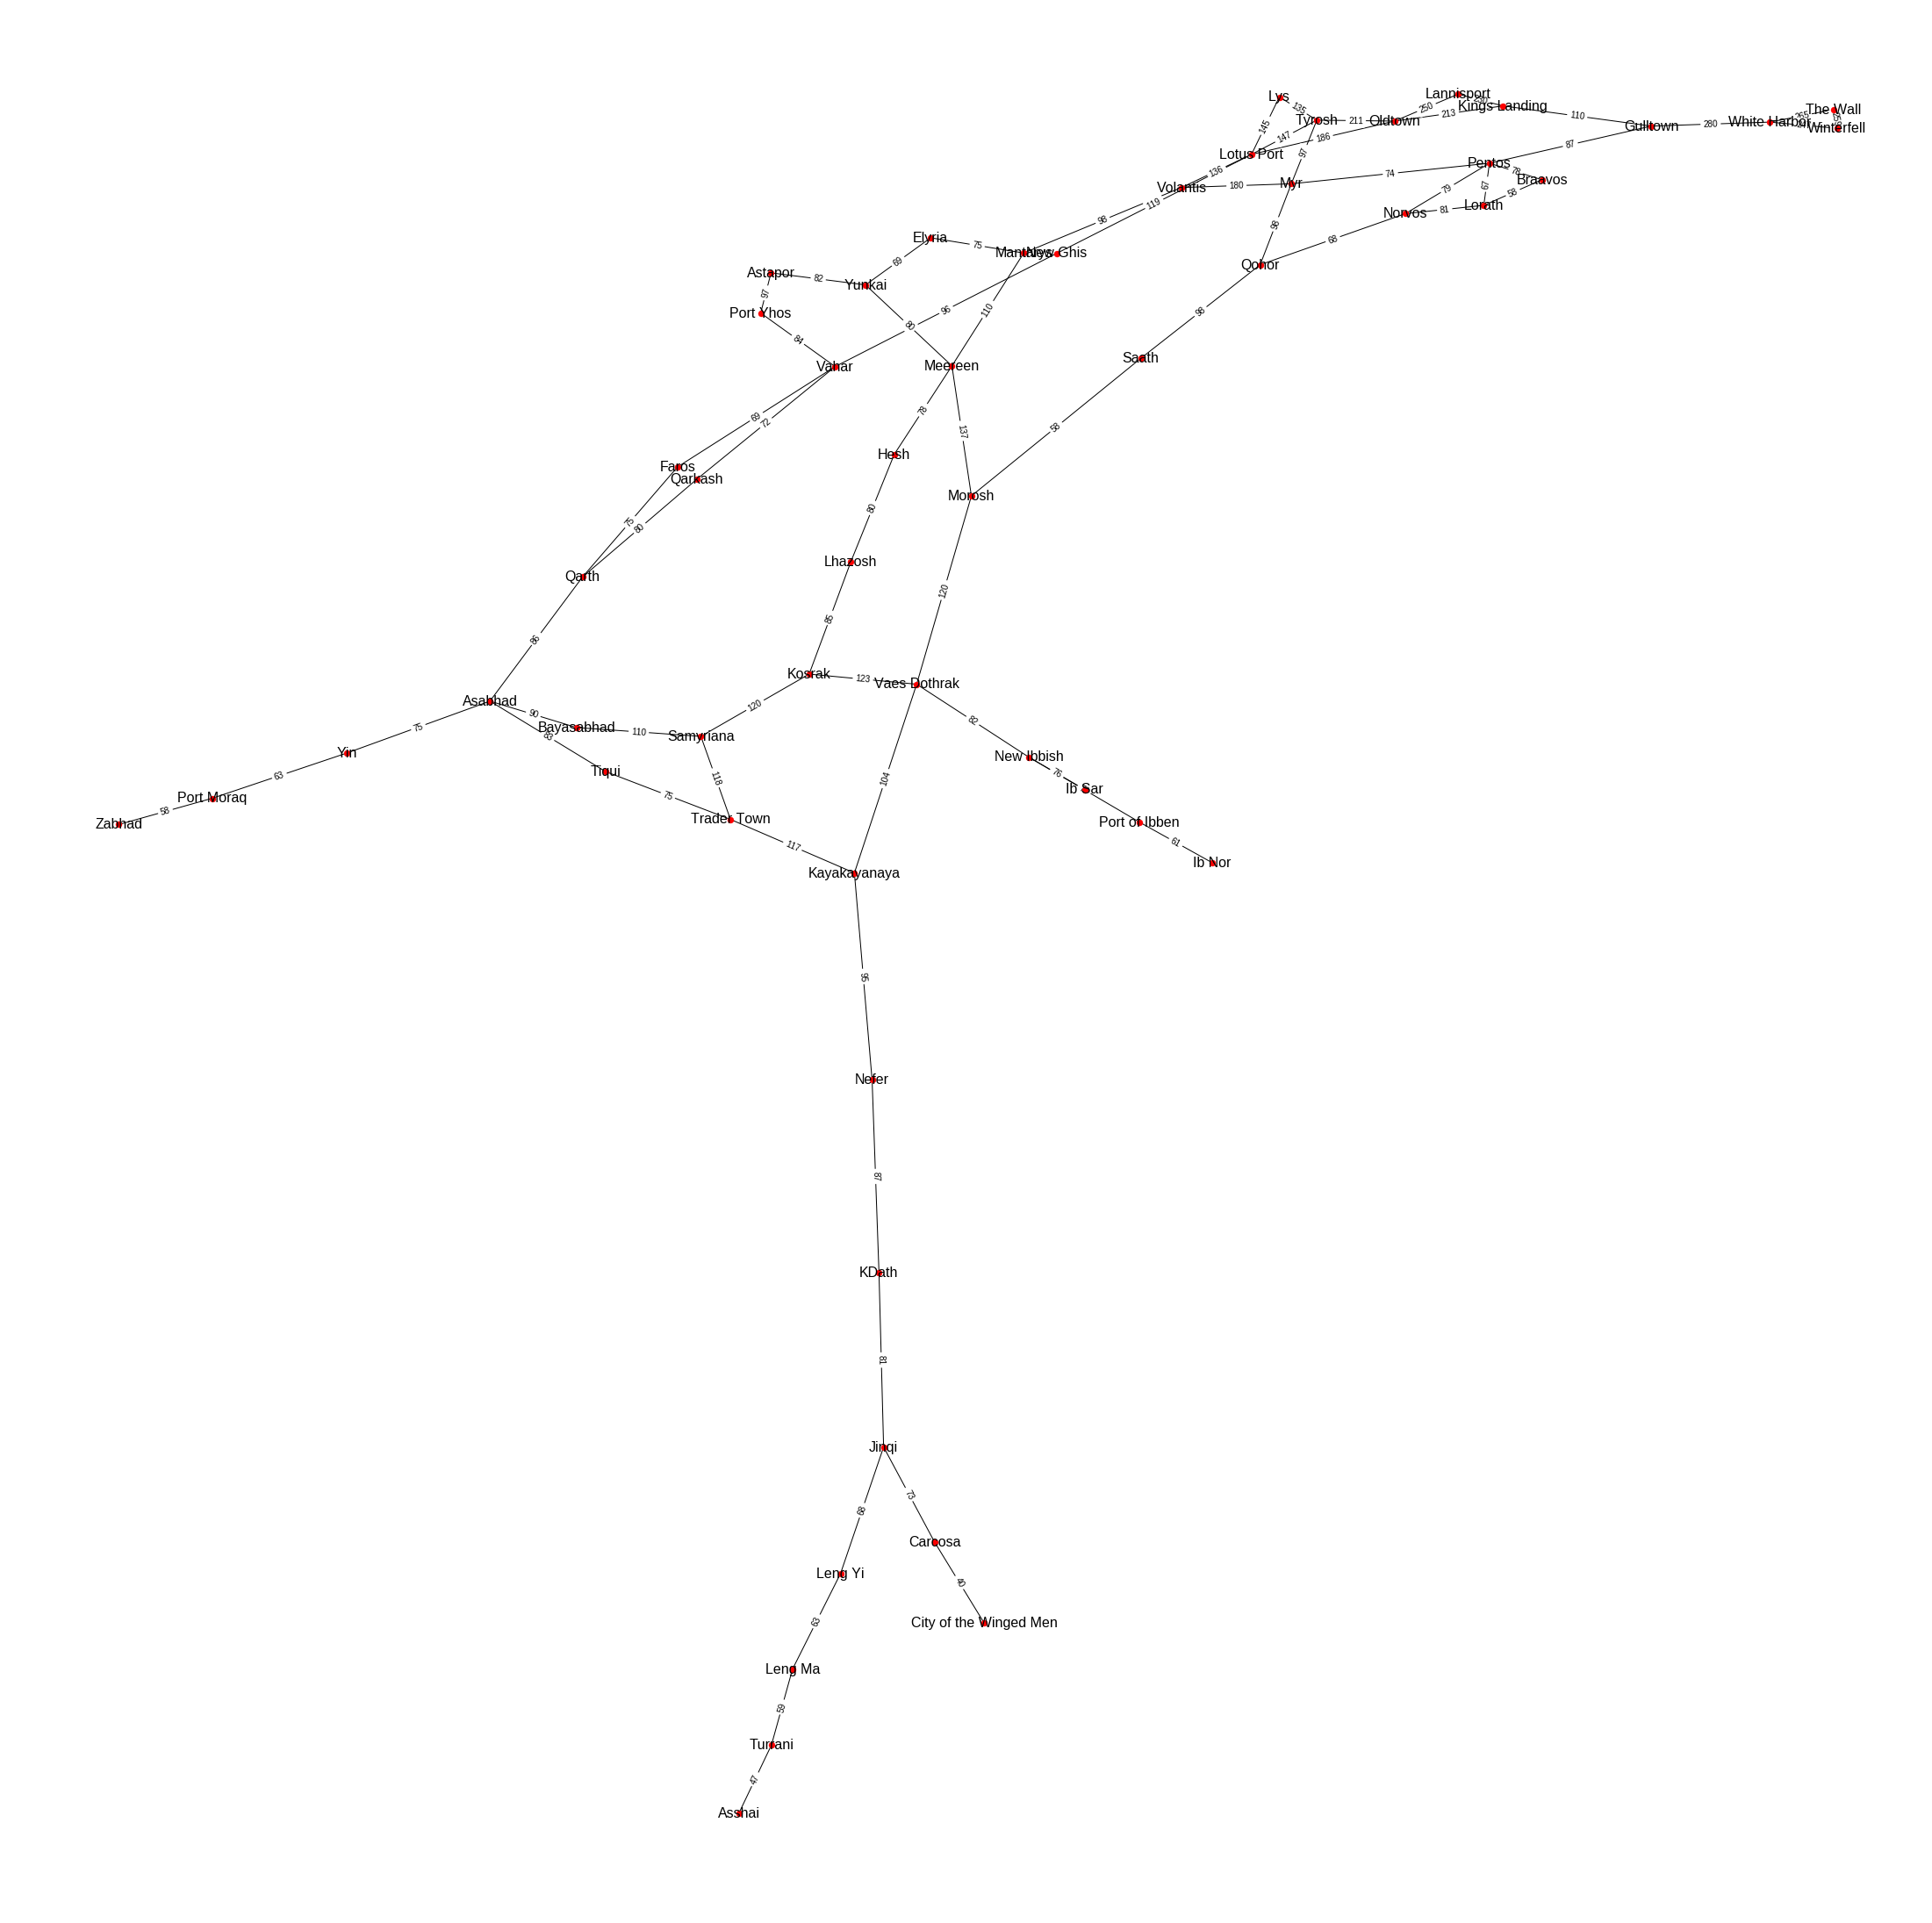

In [0]:
import pandas as pd
import io
import networkx as nx
import pylab as plt

df = pd.read_csv(io.BytesIO(uploaded['data.csv']), header = None, names = ('A','B','C'))
#df

G = nx.Graph()

#Create Nodes
for index, row in df.iterrows():
  #print(row['A'], row['B'], row['C'])
  G.add_node(row['A'], pos=(row['B'],row['C']))
  if index == 55:
    break
    
#Create Edges
for index, row in df.iterrows():
  if index > 55: #isinstance(row['B'], str):
    #print(row['B'])
    G.add_edge(row['A'],row['B'], weight = row['C'])

#Draw
#pos = nx.get_node_attributes(G,'pos')
pos =nx.circular_layout(G)
pos = nx.spring_layout(G, pos=pos)
labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx(G, pos = pos, node_size = 20, font_size = 2)
#nx.draw(G, with_labels=True, pos = pos, node_size = 40, edge_color='black',width=1,linewidths=1)
plt.figure(3,figsize=(30,30))
nx.draw(G,with_labels=True, pos = pos, node_size = 50, font_size = 16)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

**Search 2: Jon Snow**

The goal of Jon Snow in his search is to reach The Wall, as efficiently as possible.
He begins in Turrani. Running this cell should print the sequence of cities to the
optimal solution.

In [0]:
print(nx.astar_path(G, 'Turrani', 'The Wall',weight='weight' ))
print(nx.shortest_path_length(G, 'Turrani', 'The Wall', weight='weight'))

['Turrani', 'Leng Ma', 'Leng Yi', 'Jinqi', 'KDath', 'Nefer', 'Kayakayanaya', 'Vaes Dothrak', 'Morosh', 'Saath', 'Qohor', 'Norvos', 'Pentos', 'Gulltown', 'White Harbor', 'The Wall']
1612


**Question 2: Analysis**

**3. Which searching algorithm is optimal for the Jon Snow search implemented in
question I? Identify which algorithm you implemented. Is it informed or uninformed? If
there is a heuristic, which heuristic function did you choose? Explain your choice of this
search algorithm. **

The algorithm I used was A*, which is an informed search algorithm. I did not use a hueristic although if I were to use one I would use the straight line distance from Turrani to the wall (if it were given). I used this algorithm because from what I understand BFS and DFS do not use weights of edges, and UCS doesn't make sense considering the weights of the edges aren't reletively close to each other.

**4. What is the time complexity Jon Snow search implemented in question I?
Show your work and express the answer in Big O notation.**
The time complexity for this algorithm is O(b^d)